# Leads Score Case Study

### Vijaykumar Rangvani, Shruti Gupta

### 09-02-2022

**Goals of the Case Study**

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which model should be able to adjust to if the company's requirement changes in the future so we need to handle these as well. These problems are provided in a separate doc file. 

**Label/Target Column** - Converted

## Setting up the Libraries

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,precision_recall_curve,recall_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Setting Display Options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##  Reading & Inspecting the Data

In [4]:
#Reading Leads.csv dataset using 'read_csv'
leads_df = pd.read_csv("Leads.csv")

In [5]:
#Checking Data in DataFrame
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Inspecting the Data

In [6]:
#Checking Total No. of Rows-Columns and Total Null Values in DatFrame
print('########## Dataset Infomation ##########')
print ("Rows                 : " ,leads_df.shape[0])
print ("Columns              : " ,leads_df.shape[1])
print ("Total Missing values : ",leads_df.isnull().sum().values.sum())

########## Dataset Infomation ##########
Rows                 :  9240
Columns              :  37
Total Missing values :  41039


In [7]:
#Verifying column-wise info of the dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#Checking the summary for the numeric columns 
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## DATA CLEANING & EXPLORATORY DATA ANALYSIS

### Fixing Invalid Values

In [10]:
# It was observed that certain columns have a value "select". 
# This is because the user didn't selected anything and the value is set to default value - 'Select'
# The approach is to replace 'Select' with NaN

leads_df = leads_df.replace("Select",np.NaN)

###  Handling the Missing value

In [11]:
# Printing total no. of null values in Dataset
print("Total Null Values are: ", leads_df.isnull().sum().sum())

Total Null Values are:  54419


In [12]:
# Checking missing values in each column and sorting columns in Descending order
leads_df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [13]:
# calculating column-wise percentage of missing values and storing it in leads_null_df
leads_null_df = round(100*(leads_df.isnull().sum() / len(leads_df.index)), 2)
leads_null_df

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
#Printing Columns having more than 40% null value
leads_null_df[leads_null_df>40]

How did you hear about X Education    78.46
Lead Quality                          51.59
Lead Profile                          74.19
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

In [15]:
#Counting No. of Columns having more than 40% null value
print("Columns having 40% null value: ", leads_null_df[leads_null_df>40].size)

Columns having 40% null value:  7


In [16]:
#Dropping columns having null values more than 40% from app_df dataframe
leads_df.drop(columns = leads_null_df[leads_null_df>40].index, axis = 1,inplace=True)
print('Size of the dataset after removing the missing values',leads_df.shape)

Size of the dataset after removing the missing values (9240, 30)


In [17]:
# Checking missing values in each column and sorting columns in Descending order
round(100*(leads_df.isnull().sum() / len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## Data Cleaning & Treatment:

In [18]:
#Creating Categorical_plot function for plotting Converted(Dependent Variable) VS other columns(Independent Variable)
sns.set_style("darkgrid")
def Categorical_plot(col_name,r): #r= rotation for xticks
    plt.figure(figsize=(15, 10))
    plt.subplot(2,1,1)
    sns.countplot(leads_df[col_name],hue=leads_df['Converted']).legend(loc="upper right")
    plt.xticks(rotation = r)
    plt.show()

In [19]:
#Creating num_plot function for plotting Converted(Dependent Variable) VS other columns(Independent Variable)
sns.set_style("darkgrid")
def num_plot(col_name,r):  #r= rotation for xticks
    plt.figure(figsize=(10, 7))
    plt.subplot(2,1,1)
    sns.boxplot(x="Converted",y=col_name,data=leads_df)
    plt.xticks(rotation = r)
    plt.show()
    plt.subplot(2,1,2)
    sns.barplot(x="Converted",y=col_name,data=leads_df)
    plt.show()

In [20]:
# Creating check_outlier function for plotting boxplot inorder to check outliers
sns.set_style("darkgrid")
def check_outlier(col_name,r):
    plt.figure(figsize=(10, 7))
    plt.subplot(2,1,1)
    sns.boxplot(y=leads_df[col_name])
    plt.xticks(rotation = r)
    plt.show()

In [21]:
# Creating var_map function for categorizing the values as Others which are less in proportion 
def var_map(m):
    if m in col.index:
        return 'Others'
    else:
        return m

#### Country 

In [22]:
#checking value counts of Country column
leads_df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
Uganda                     2
China                      2
Philippines                2
Belgium                    2
Bangladesh                 2
Ghana                      2
Italy                      2
Netherlands                2
Asia/Pacific Region        2
Tanzania                   1
Sri Lanka                  1
Liberia                    1
Malaysia                   1
Vietnam                    1
Denmark       

In [23]:
# filling Null Values of Country column as Not Specified
leads_df["Country"].fillna("Not Specified",inplace =True)

In [24]:
# Categorizing the country column values in 3 categories: 1. India 2. Not Specified 3.Outside India

# Creating Country_map function to categorize the country column values 
def Country_map(m):
    if m == 'India':
        return 'India'
    elif m == "Not Specified":
        return 'Not Specified'
    else:
        return 'Outside India'

# Applying Country_map function on country column
leads_df["Country"] = leads_df["Country"].apply(Country_map) 

In [25]:
# Displaying the results for Country column
leads_df["Country"].head()

0    Not Specified
1            India
2            India
3            India
4            India
Name: Country, dtype: object

#### City 

In [26]:
#checking value counts of City column
leads_df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
# Since Mumbai is the highest occurrence in the data set, we replace NULL values with Mumbai
leads_df["City"].fillna("Mumbai",inplace=True)

In [28]:
#checking value counts of City column
leads_df['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Tags

In [29]:
#checking value counts of Tags column
leads_df['Tags'].value_counts(dropna=False) 

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [30]:
#checking value counts of Tags column in terms of percentage
leads_df['Tags'].value_counts(dropna=False,normalize=True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [31]:
# filling Null Values of Tags column as Not Specified
leads_df["Tags"].fillna("Not Specified",inplace=True)

In [32]:
# Grouping the categories of Tags columns that are less in proportion(less than 150)
col = leads_df['Tags'].value_counts(dropna=False).to_frame()
col = col[col.Tags<150]
col.index

Index(['Not doing further education', 'Interested  in full time MBA',
       'Graduation in progress', 'invalid number',
       'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Still Thinking', 'Want to take admission but has financial problems',
       'Interested in Next batch', 'In confusion whether part time or DLP',
       'Lateral student', 'University not recognized',
       'Shall take in the next coming month',
       'Recognition issue (DEC approval)'],
      dtype='object')

In [33]:
# Applying var_map function to group the less proportion Categories as 'Others'
leads_df["Tags"] = leads_df["Tags"].apply(var_map) 

In [34]:
# Displaying the results for Tags column
leads_df["Tags"].head()

0            Interested in other courses
1                                Ringing
2    Will revert after reading the email
3                                Ringing
4    Will revert after reading the email
Name: Tags, dtype: object

#### Specialization

In [35]:
#checking value counts of Specialization column 
leads_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [36]:
# filling Null Values of Specialization column as Not Specified
leads_df['Specialization'].fillna('Not Specified',inplace=True)

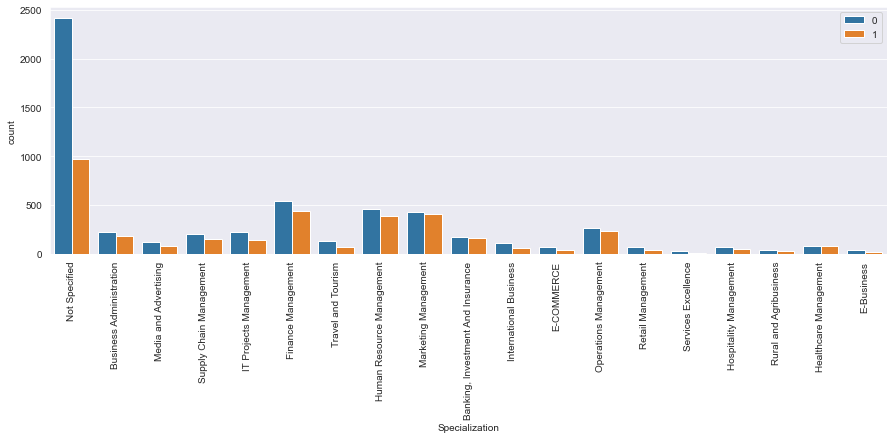

In [37]:
# Plotting the Specialization column to verify if any similar types of Specialization that can be grouped
Categorical_plot('Specialization',90) # 90 is the rotaion angle for xticks

**Inferences** 
- It is clearly visible, that there are several Management Specializations, which can be grouped in single category

In [38]:
# From above plot found that there are several Management Specializations
# Hence, grouping Management Specializations in one category as Management_Specializations

def Specialization_map(m):
    if m.endswith('Management'):
        return 'Management_Specializations'
    else:
        return m

leads_df['Specialization'] = leads_df['Specialization'].apply(Specialization_map)  

In [39]:
# Displaying the results for Specialization column
leads_df["Specialization"].head()

0              Not Specified
1              Not Specified
2    Business Administration
3      Media and Advertising
4              Not Specified
Name: Specialization, dtype: object

In [40]:
#checking percentage of missing values
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### What is your current occupation

In [41]:
# checking value counts of What is your current occupation column 
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [42]:
# checking no. of unique and top values in What is your current occupation column 
leads_df["What is your current occupation"].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [43]:
# filling Null Values of What is your current occupation with 'Unemployed'
leads_df['What is your current occupation'].fillna('Unemployed',inplace=True)

In [44]:
#checking count of values after imputing Null Values
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### What matters most to you in choosing a course

In [45]:
# checking value counts of What matters most to you in choosing a course column 
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [46]:
# checking no. of unique and top values in What matters most to you in choosing a course column 
leads_df["What matters most to you in choosing a course"].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [47]:
# filling Null Values of What is your current occupation with 'Better Career Prospects'
leads_df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [48]:
#checking value counts again after imputing Null Values
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Lead Source

In [49]:
# checking value counts of Lead Source column 
leads_df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
blog                    1
welearnblog_Home        1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [50]:
# Grouping Google and google in same category as Google             
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

In [51]:
# checking no. of unique and top values in Lead Source column 
leads_df["Lead Source"].describe()

count       9204
unique        20
top       Google
freq        2873
Name: Lead Source, dtype: object

In [52]:
# As Null Values are less in number,filling Null Values of Lead Source column as Others
leads_df['Lead Source'].fillna('Others',inplace=True)

In [53]:
# Grouping the categories of Lead Source columns that are less in proportion(less than 50)
col = leads_df['Lead Source'].value_counts(dropna=False).to_frame()
col = col[col['Lead Source']<50]

In [54]:
# Applying var_map function to group the less proportion Categories as 'Others'
leads_df["Lead Source"] = leads_df["Lead Source"].apply(var_map) 

In [55]:
#checking value counts of Lead Source column
leads_df['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Facebook              55
Name: Lead Source, dtype: int64

#### Last Activity:

In [56]:
#checking value counts of Last Activity column
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [57]:
# Grouping the categories of Last Activity columns that are less in proportion(less than 100)
col = leads_df['Last Activity'].value_counts(dropna=False).to_frame()
col = col[col['Last Activity']<100]

In [58]:
# Applying var_map function to group the less proportion Categories as 'Others'
leads_df["Last Activity"] = leads_df["Last Activity"].apply(var_map) 

In [59]:
#checking value counts of Last Activity column
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
NaN                           103
Name: Last Activity, dtype: int64

#### Lead Origin

In [60]:
#checking value counts of Lead Origin column
leads_df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

#### Last Notable Activity

In [61]:
#checking value counts of last Notable Activity
leads_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [62]:
# Grouping the categories of Last Notable Activity columns that are less in proportion(less than 50)
col = leads_df['Last Notable Activity'].value_counts(dropna=False).to_frame()
col = col[col['Last Notable Activity']<30]

In [63]:
# Applying var_map function to group the less proportion Categories as 'Others'
leads_df["Last Notable Activity"] = leads_df["Last Notable Activity"].apply(var_map) 

#### Total Visits


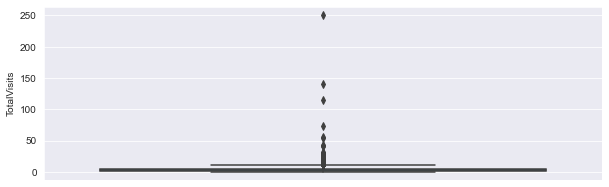

In [64]:
# Checking outliers for TotalVisits coulmns
check_outlier('TotalVisits',0)

**Inferences** 
- There are large number of outliers present in TotalVisits Column

In [65]:
#checking percentile values for "Total Visits"
leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [66]:
#Outlier Treatment: cap the values to 95% percentile of the Column Outlier values
q3 = leads_df['TotalVisits'].quantile(0.95)
q1 = leads_df['TotalVisits'].quantile(0.01)
leads_df = leads_df.loc[(leads_df['TotalVisits'] >= q1) & (leads_df['TotalVisits'] <= q3)]


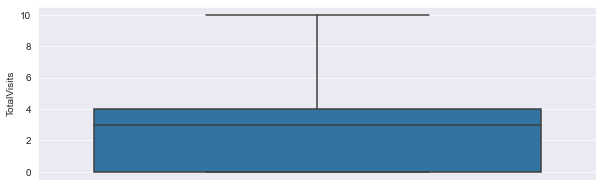

In [67]:
# Checking outliers for TotalVisits coulmns again
check_outlier('TotalVisits',0)

#### Total Time Spent on Website

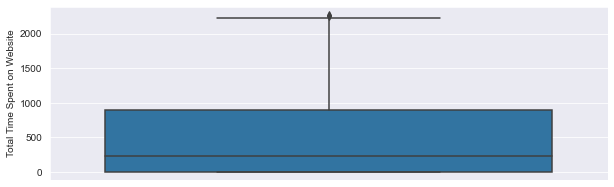

In [68]:
# Checking outliers for Total Time Spent on Website coulmns
check_outlier('Total Time Spent on Website',0)

**Inferences** 
- There is very negligible outliers present in Total Time Spent on Website Column which can be ignored

#### Page Views Per Visit

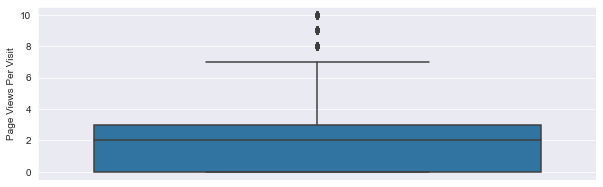

In [69]:
# Checking outliers for Page Views Per Visit coulmns
check_outlier('Page Views Per Visit',0)

**Inferences** 
- There are large number of outliers present in Page Views Per Visit Column

In [70]:
#checking percentile values for Page Views Per Visit
leads_df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8750.000000
mean        2.248421
std         1.923434
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

In [71]:
#Outlier Treatment: cap the values to 95% percentile of the Column Outlier values

q3 = leads_df['Page Views Per Visit'].quantile(0.95)
q1 = leads_df['Page Views Per Visit'].quantile(0.05)

leads_df = leads_df.loc[(leads_df['Page Views Per Visit'] >= q1) & (leads_df['Page Views Per Visit'] <= q3)]

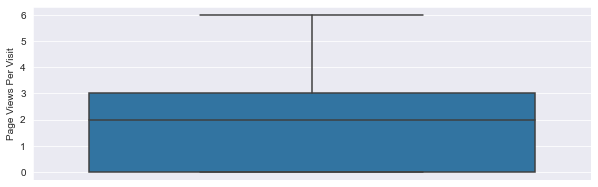

In [72]:
#checking percentile values for Page Views Per Visit again
check_outlier('Page Views Per Visit',0)

#### Checking Null Values after dealing with columns individually 

In [73]:
#Check the Null Values in All Columns:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 4)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

**Inferences**
-  There are no missing values in any columns.

## EXPLORATORY DATA ANALYSIS

### Categorical Column Analysis:

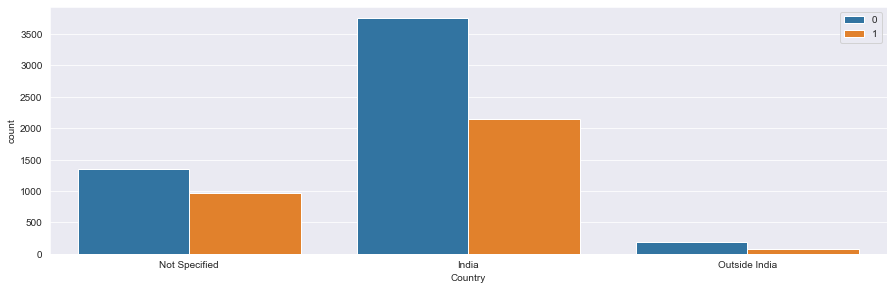

In [74]:
# Ploting Country column
Categorical_plot('Country',0)

**Inferences** 
- Number of users from India are higher than other two categories: Not Specified and Outside India
- Conversion Rate is also highest for Indian Users

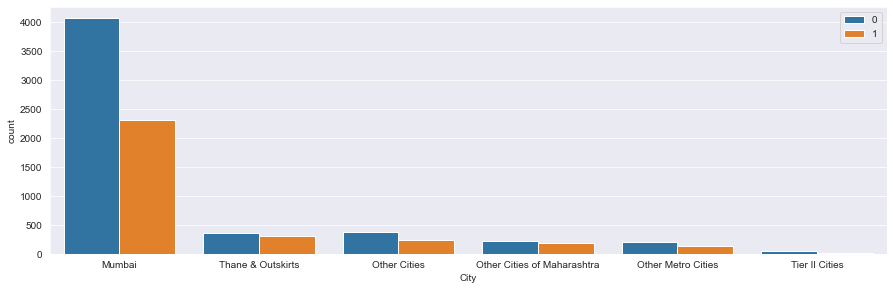

In [75]:
# Ploting City column
Categorical_plot('City',0)

**Inferences** 
- Maximum no. of users are from Mumbai City
- Conversion Rate is also highest for Mumbai City Users

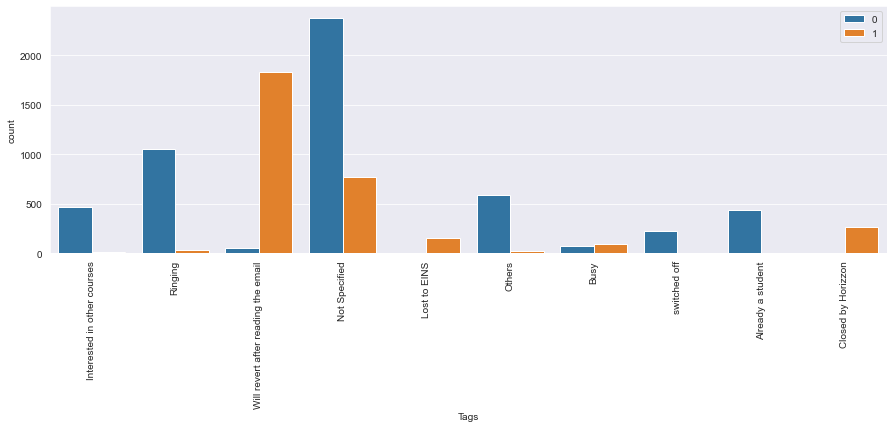

In [76]:
# Ploting Tags column
Categorical_plot('Tags',90)

**Inferences** 
- Tags are not specified for most number of users
- Conversion Rate is highest for users having the value as Will revert after reading the email.

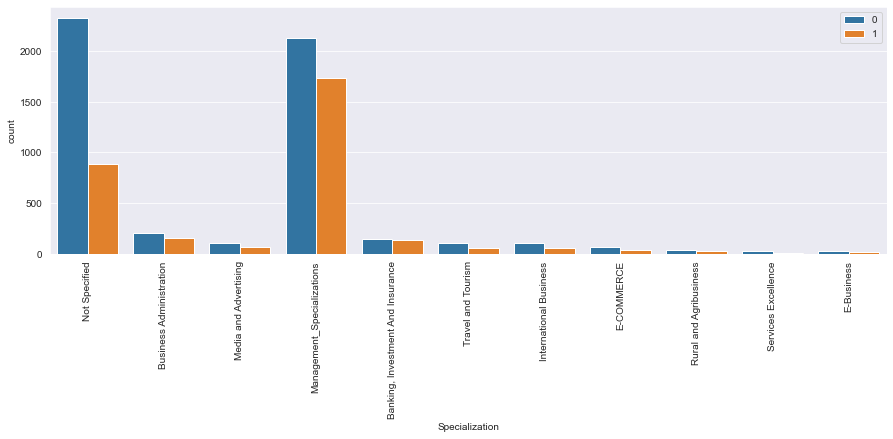

In [77]:
# Ploting Specialization column 
Categorical_plot('Specialization',90)

**Inferences** 
- Visitors with Specialization in managment generates higher number of leads 
- Conversion Rate is for Visitors with Specialization in managment skills.

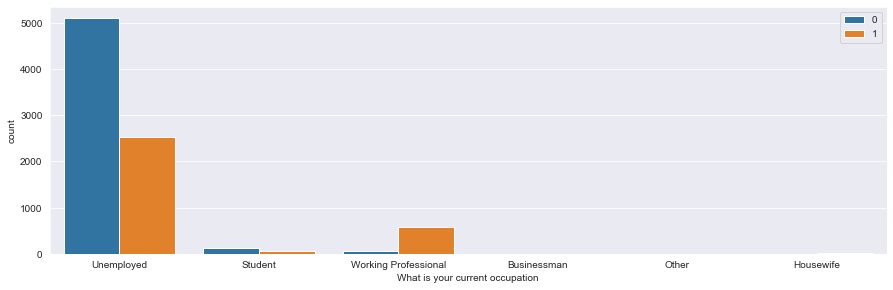

In [78]:
# Ploting What is your current occupation column
Categorical_plot('What is your current occupation',0)

**Inferences** 
- Visitors that are umemployed generates higher number of leads 
- Conversion Rate is good for umemployed as well as for working proessionals

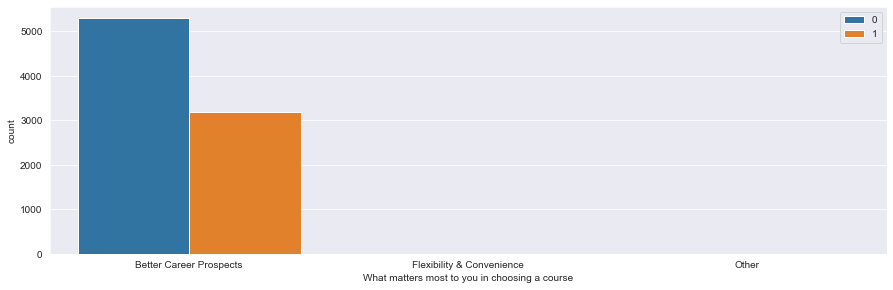

In [79]:
# Ploting What matters most to you in choosing a course column
Categorical_plot('What matters most to you in choosing a course',0)

**Inferences** 
- Visitors that have course joining motive as better career generates higher number of leads 
- Conversion Rate is also quite for such visitors

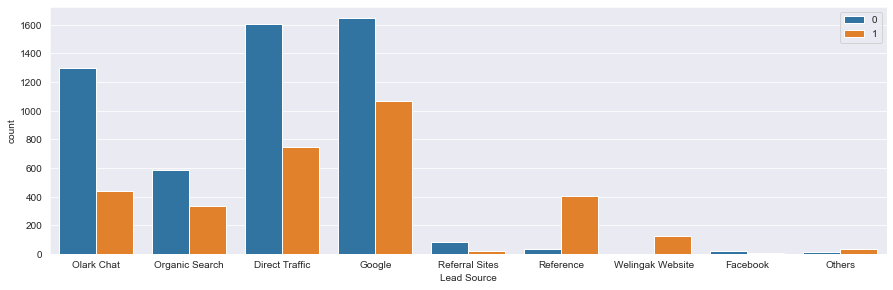

In [80]:
# Ploting Lead Source column
Categorical_plot('Lead Source',0)

**Inferences** 
- Google and Direct Traffic generates higher number of leads 
- Conversion Rate is also quite for Google and Direct Traffic generated leads. 
- Reference and website as lead source are less in proportion but has good conversion rate

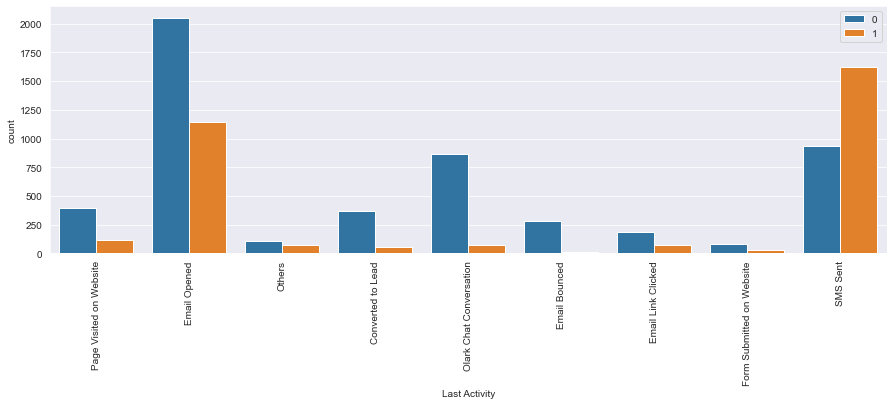

In [81]:
# Ploting Last Activity column
Categorical_plot('Last Activity',90)

**Inferences** 
- Email,SMS and chat conversion activities helps to produce higher number of leads 
- Conversion Rate is best for SMS and Email conversion 
- Conversion Rate can be improved for visitors that engage in Chat conversion.

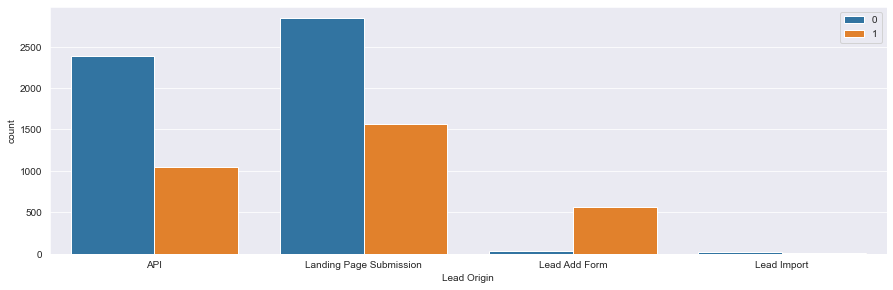

In [82]:
# Ploting Lead Origin column
Categorical_plot('Lead Origin',0)

**Inferences** 
- API and Landing Page are major sources for generating higher number of leads 
- Conversion Rate is also good for both the API and Landing Page
- Conversion Rate is very good for Lead Add form but it is very less in terms of proportion

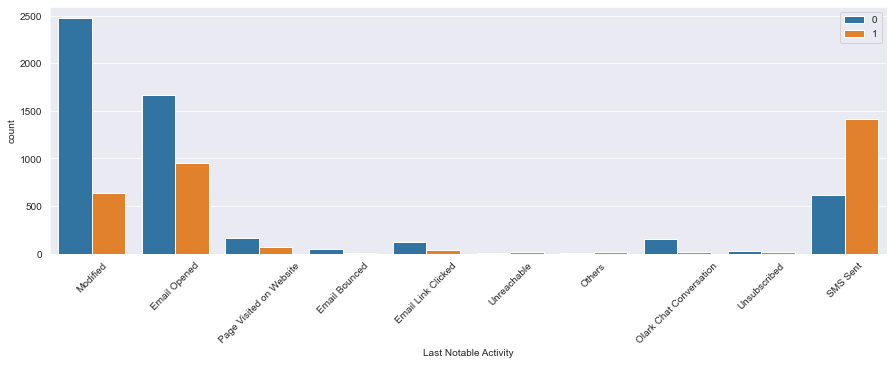

In [83]:
# Ploting Last Notable Activity column
Categorical_plot('Last Notable Activity',45)

**Inferences** 
- Visitors with Last Activity status as modified,opening email, SMS Sent brings higher number of leads as compared to others
- Conversion Rate is best for SMS Sent category visitors among the mentioned three activities 

In [84]:
# Checking Value counts for Do Not Call column
leads_df['Do Not Call'].value_counts(dropna=False)

No     8472
Yes       2
Name: Do Not Call, dtype: int64

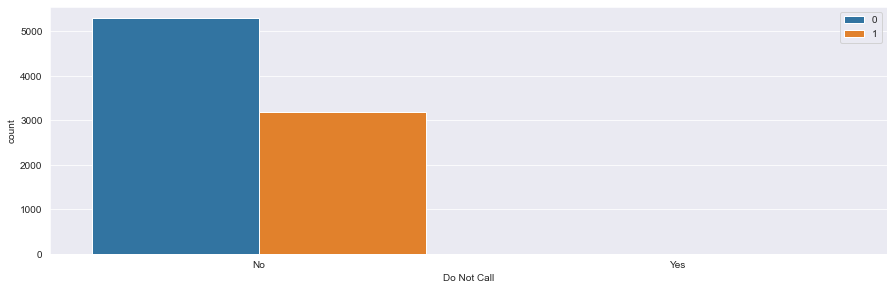

In [85]:
# Ploting Do Not Call column
Categorical_plot('Do Not Call',0)

**Inferences** 
- This column is baised towards one value('No' value)

In [86]:
# Checking Value counts for Do Not Email column
leads_df['Do Not Email'].value_counts(dropna=False)

No     7816
Yes     658
Name: Do Not Email, dtype: int64

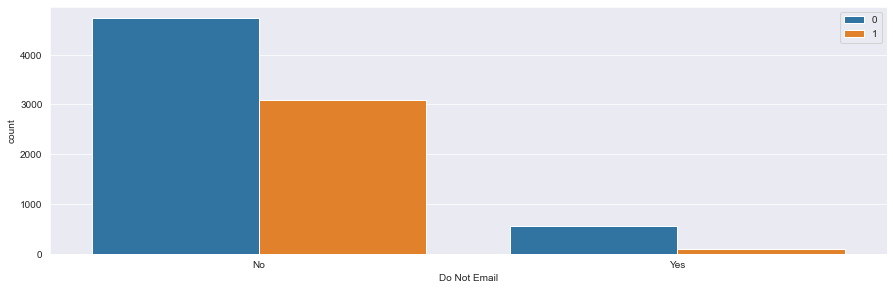

In [87]:
# Ploting Do Not Email column
Categorical_plot('Do Not Email',0)

**Inferences** 
- This column is baised towards one value('No' value)

In [88]:
# Checking Value counts for Magazine column
leads_df['Magazine'].value_counts(dropna=False)

No    8474
Name: Magazine, dtype: int64

In [89]:
# Checking Value counts for Newspaper Article column
leads_df['Newspaper Article'].value_counts(dropna=False)

No    8474
Name: Newspaper Article, dtype: int64

In [90]:
# Checking Value counts for Update me on Supply Chain Content column
leads_df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    8474
Name: Update me on Supply Chain Content, dtype: int64

In [91]:
# Checking Value counts for Get updates on DM Content column
leads_df['Get updates on DM Content'].value_counts(dropna=False)

No    8474
Name: Get updates on DM Content, dtype: int64

In [92]:
# Checking Value counts for I agree to pay the amount through cheque column
leads_df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    8474
Name: I agree to pay the amount through cheque, dtype: int64

In [93]:
# # Checking Value counts for A free copy of Mastering The Interview column
leads_df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     5939
Yes    2535
Name: A free copy of Mastering The Interview, dtype: int64

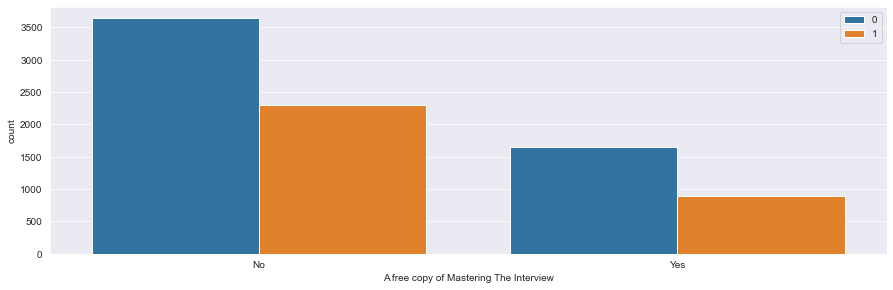

In [94]:
# Plotting A free copy of Mastering The Interview column
Categorical_plot('A free copy of Mastering The Interview',0)

In [95]:
# Manually identifed List of variables to drop that are supposed to be dropped based on EDA performed above
# Most of these columns have most of the values towards one attribute using them might lead to biasing in the model

columns_to_drop = ['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                   'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                   'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview','What matters most to you in choosing a course']

In [96]:
# Dropping the columns
leads_df = leads_df.drop(columns_to_drop,1)

In [97]:
# Checking the shape of leads_df
leads_df.shape

(8474, 15)

### Numerical Column Analysis:

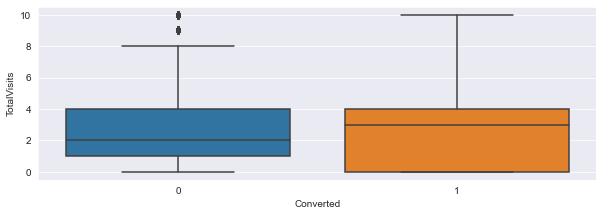

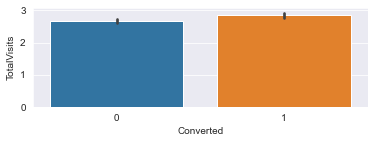

In [98]:
# Plotting TotalVisits column
num_plot('TotalVisits',0)

**Inferences** 
- Median for converted and not converted leads is almost equal.
- Hence no Inferences can be made on the basis of Total Visits

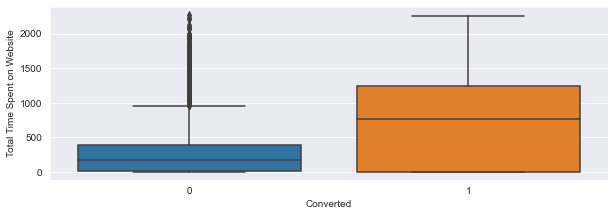

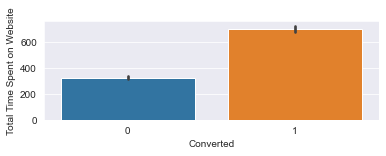

In [99]:
# Plotting Total Time Spent on Website column
num_plot("Total Time Spent on Website",0)

**Inferences** 
- Conversion rate is higher for users with more time spent on website
- Enganging UI can be developed for Website so that users spend more time.

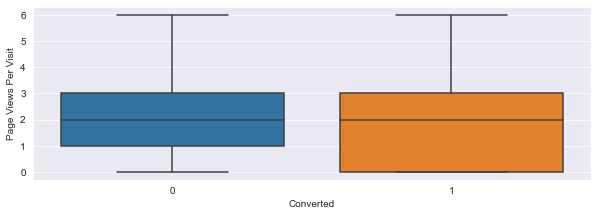

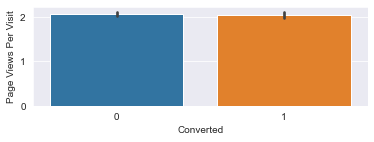

In [100]:
# Plotting Page Views Per Visit column 
num_plot('Page Views Per Visit',0)

**Inferences** 
- Median for converted and not converted leads is almost equal.
- Hence no Inferences can be made on the basis of Page Views Per Visit

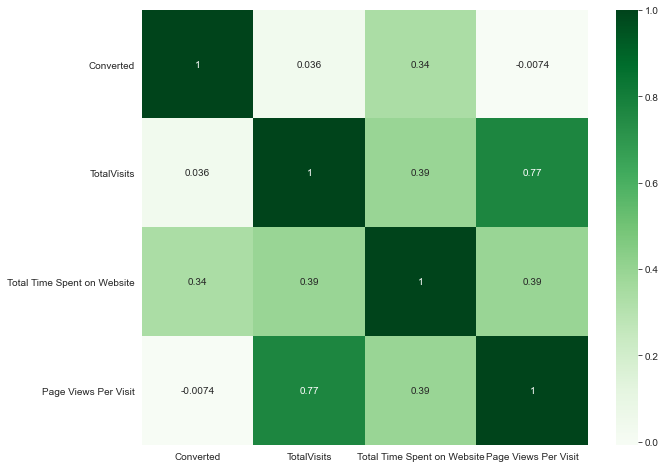

In [101]:
# Plotting heatmap to define relationship between continuous variables
plt.figure(figsize=(10,8))
sns.heatmap(leads_df.corr(), cmap="Greens", annot=True)
plt.show()

**Inferences**
- There is co-relation between Converted and Total Time spent on website.
- Hence, Customers are more likely to contribute to converted category when they spend more time on website 

## Calculating Conversion Ratio

In [102]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

37.65636063252301

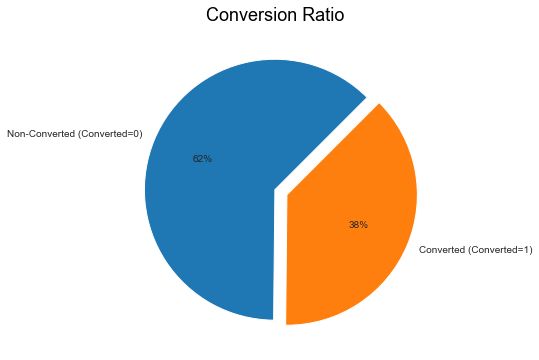

In [103]:
#Plotting Pie-Chart for Conversion Ratio
plt.figure(figsize=(6,6))
plt.pie(leads_df['Converted'].value_counts(normalize=True)*100,labels=['Non-Converted (Converted=0)','Converted (Converted=1)'],explode=(0,0.10), startangle=45,autopct='%1.f%%')
plt.title('Conversion Ratio',fontsize= 18,fontweight= 9,color='Black')
plt.show()

**Inferences** 
- Conversion Rate is around 38%.

### Data preparation

#### Converting Binary (Yes/No) variables to 1/0

In [104]:
# mapping 'Do Not Email','Do Not Call' column values to 0s & 1s
leads_df[['Do Not Email','Do Not Call']] = leads_df[['Do Not Email','Do Not Call']].apply(lambda x: x.map({'Yes': 1, "No": 0}))

In [105]:
# Checking the dataframe
leads_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,Modified


### CREATING DUMMY VARIABLES

In [106]:
#getting a list of categorical columns and saving under leads_cat
leads_cat= leads_df.select_dtypes(include=['object']).columns
leads_cat

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [107]:
# Dropping Prospect ID colum as it contains unique ID values and supposed to be included for Dummy creation process
leads_cat = leads_cat.drop(['Prospect ID'])
leads_cat.shape

(8,)

In [108]:
# Checking leads_cat
leads_cat

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [109]:
#Creating Dummy variable and saving it under dummy_var
dummy_var = pd.get_dummies(leads_df[leads_cat],drop_first=True)
dummy_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [110]:
#Creating Dummy variable and saving it under Dummy_var
dummy_var.shape

(8474, 57)

In [111]:
#Concat operation for merging  dummy_var with leads_df
leads_df = pd.concat([leads_df, dummy_var], axis = 1)
leads_df.drop(leads_cat,axis = 1,inplace = True)

## Train-Test Split & Logistic Regression Model Building:

In [112]:
# CREATING X
X = leads_df.drop(['Prospect ID','Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [113]:
# CREATING y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [114]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=140)

In [115]:
# checking Datypes for X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5931 entries, 5663 to 4631
Data columns (total 62 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          5931 non-null   int64  
 1   Do Not Call                                           5931 non-null   int64  
 2   TotalVisits                                           5931 non-null   float64
 3   Total Time Spent on Website                           5931 non-null   int64  
 4   Page Views Per Visit                                  5931 non-null   float64
 5   Lead Origin_Landing Page Submission                   5931 non-null   uint8  
 6   Lead Origin_Lead Add Form                             5931 non-null   uint8  
 7   Lead Origin_Lead Import                               5931 non-null   uint8  
 8   Lead Source_Facebook                                  5

In [116]:
# Verfying for X_train dataframe
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.00000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000
mean,0.077559,0.000169,2.760749,471.322880,2.077468,0.521666,0.071489,0.003541,0.003541,0.324734,0.202664,0.110774,0.006913,0.052099,0.011971,0.014837,0.036756,0.030012,0.372618,0.01332,0.110268,0.021919,0.058338,0.309223,0.042994,0.005733,0.011465,0.019727,0.458776,0.020064,0.374642,0.006913,0.004384,0.021750,0.001180,0.001349,0.021244,0.898668,0.076884,0.019221,0.030855,0.059181,0.019390,0.368066,0.073175,0.129826,0.222054,0.027483,0.069297,0.049739,0.042151,0.079582,0.007587,0.019221,0.300624,0.366886,0.020907,0.002023,0.029000,0.245490,0.003709,0.005058
std,0.267498,0.012985,2.326745,545.066016,1.653675,0.499572,0.257661,0.059404,0.059404,0.468315,0.402018,0.313878,0.082863,0.222246,0.108764,0.120912,0.188178,0.170634,0.483543,0.11465,0.313250,0.146431,0.234400,0.462212,0.202862,0.075503,0.106469,0.139072,0.498340,0.140231,0.484071,0.082863,0.066070,0.145879,0.034337,0.036705,0.144210,0.301793,0.266430,0.137313,0.172939,0.235982,0.137902,0.482320,0.260445,0.336141,0.415662,0.163499,0.253980,0.217423,0.200951,0.270668,0.086781,0.137313,0.458568,0.481996,0.143085,0.044939,0.167821,0.430414,0.060796,0.070947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [117]:
#Checking the shape of dataframe X_train
X_train.shape

(5931, 62)

### Feature scaling


In [118]:
#SCALING THE NUMERICAL DATA using StandardScaler
scaler = StandardScaler()
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
5663,0,0,0.962478,0.048947,1.767445,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7446,0,0,-1.186628,-0.864781,-1.256379,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
698,0,0,3.111583,-0.501491,0.757488,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
214,0,0,0.962478,-0.484978,0.255533,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8963,0,0,0.102835,-0.373056,-0.349232,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [119]:
# Verfying X_train dataframe after scaling
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,5931.000000,5931.000000,5.931000e+03,5.931000e+03,5.931000e+03,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.00000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000,5931.000000
mean,0.077559,0.000169,-5.202006e-17,3.360058e-18,-3.385422e-16,0.521666,0.071489,0.003541,0.003541,0.324734,0.202664,0.110774,0.006913,0.052099,0.011971,0.014837,0.036756,0.030012,0.372618,0.01332,0.110268,0.021919,0.058338,0.309223,0.042994,0.005733,0.011465,0.019727,0.458776,0.020064,0.374642,0.006913,0.004384,0.021750,0.001180,0.001349,0.021244,0.898668,0.076884,0.019221,0.030855,0.059181,0.019390,0.368066,0.073175,0.129826,0.222054,0.027483,0.069297,0.049739,0.042151,0.079582,0.007587,0.019221,0.300624,0.366886,0.020907,0.002023,0.029000,0.245490,0.003709,0.005058
std,0.267498,0.012985,1.000084e+00,1.000084e+00,1.000084e+00,0.499572,0.257661,0.059404,0.059404,0.468315,0.402018,0.313878,0.082863,0.222246,0.108764,0.120912,0.188178,0.170634,0.483543,0.11465,0.313250,0.146431,0.234400,0.462212,0.202862,0.075503,0.106469,0.139072,0.498340,0.140231,0.484071,0.082863,0.066070,0.145879,0.034337,0.036705,0.144210,0.301793,0.266430,0.137313,0.172939,0.235982,0.137902,0.482320,0.260445,0.336141,0.415662,0.163499,0.253980,0.217423,0.200951,0.270668,0.086781,0.137313,0.458568,0.481996,0.143085,0.044939,0.167821,0.430414,0.060796,0.070947
min,0.000000,0.000000,-1.186628e+00,-8.647808e-01,-1.256379e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

### Model Building

#### RTE

In [120]:
# USING RFE APPROACH FOR FEATURE SELECTION
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [121]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 2),
 ('Do Not Call', False, 46),
 ('TotalVisits', False, 32),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 48),
 ('Lead Source_Others', False, 10),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 21),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 30),
 ('Last Activity_Email Link Clicked', False, 20),
 ('Last Activity_Email Opened', False, 16),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Others', False, 12),
 ('Last Activity_Page Visited on Website', False, 31),
 ('Last Activity_SMS Sent', True, 1),

In [122]:
#list of RFE supported columns
ref_col = X_train.columns[rfe.support_]
ref_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [123]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising', 'Specialization_Not Specified',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_

#### Model Building

In [124]:
#Creating build_model function which will return res and X_train_rfe values

def build_model(X_train_rfe):
    X_train_sm = sm.add_constant(X_train_rfe)
    lm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = lm.fit()
    return res,X_train_sm

In [125]:
#Creating check_vif function which will return vif values

def check_vif(X_train_rfe):
    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### Building Model-1

In [126]:
#Passing values to build_model fucntion to build model 
ref_col = X_train.columns[rfe.support_]
X_train_rfe = X_train[ref_col]
lm1,X_train_rfe1 =build_model(X_train_rfe) 
lm1_vif = check_vif(X_train_rfe)

In [127]:
# Printing summary of the model
print(lm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5915
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1180.8
Date:                Wed, 09 Feb 2022   Deviance:                       2361.6
Time:                        17:57:36   Pearson chi2:                 9.69e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [128]:
#Printing VIF summary for the model
print(lm1_vif)

                                         Features   VIF
14                 Last Notable Activity_SMS Sent  6.20
4                          Last Activity_SMS Sent  6.04
1                       Lead Origin_Lead Add Form  1.84
10       Tags_Will revert after reading the email  1.74
12                 Last Notable Activity_Modified  1.74
8                              Tags_Not Specified  1.70
2                          Lead Source_Olark Chat  1.69
0                     Total Time Spent on Website  1.49
3                    Lead Source_Welingak Website  1.33
6                         Tags_Closed by Horizzon  1.21
9                                    Tags_Ringing  1.15
13  Last Notable Activity_Olark Chat Conversation  1.08
7                               Tags_Lost to EINS  1.07
5                                       Tags_Busy  1.06
11                              Tags_switched off  1.05


**Inferences** 
- `P-values` are less than `0.05` for all the observed features for Model-1.
- Higher `VIF` value is very high for `Last Notable Activity_SMS Sent` and `Last Activity_SMS Sent` column for Model-1.

**NOTE:**
- **VIF less than 5 is considered to be in acceptable range**
- **P-Value less than 0.05 is considered to be in acceptable range** 

As there is a high correlation between two variables so we drop the variable with the higher valued VIF value

#### Building Model-2

In [129]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['Last Notable Activity_SMS Sent'],axis=1)

In [130]:
#Passing values to build_model fucntion to build model 2 
lm2,X_train_rfe2 =build_model(X_train_rfe)
lm2_vif = check_vif(X_train_rfe)

In [131]:
# Printing summary of the model
print(lm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5916
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1187.8
Date:                Wed, 09 Feb 2022   Deviance:                       2375.6
Time:                        17:57:37   Pearson chi2:                 9.90e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [132]:
#Printing VIF summary for the model
print(lm2_vif)

                                         Features   VIF
1                       Lead Origin_Lead Add Form  1.84
8                              Tags_Not Specified  1.68
10       Tags_Will revert after reading the email  1.68
2                          Lead Source_Olark Chat  1.67
4                          Last Activity_SMS Sent  1.67
0                     Total Time Spent on Website  1.49
12                 Last Notable Activity_Modified  1.43
3                    Lead Source_Welingak Website  1.33
6                         Tags_Closed by Horizzon  1.21
9                                    Tags_Ringing  1.13
13  Last Notable Activity_Olark Chat Conversation  1.08
7                               Tags_Lost to EINS  1.07
5                                       Tags_Busy  1.05
11                              Tags_switched off  1.04


**Inferences** 
- `P-values` are less than `0.05` for all the observed features for Model-2.
- `VIF` value is also less than `5` for all the observed for Model-2.

**NOTE:**
- **VIF less than 5 is considered to be in acceptable range**
- **P-Value less than 0.05 is considered to be in acceptable range** 

In [133]:
# Getting the Predicted values on the train set
y_train_pred = lm2.predict(X_train_rfe2)
y_train_pred[:10]

5663    0.007373
7446    0.048676
698     0.095199
214     0.019914
8963    0.912357
7664    0.349622
3833    0.036106
4141    0.663255
320     0.969152
1893    0.088841
dtype: float64

In [134]:
# Re-shapping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00737265, 0.04867611, 0.09519857, 0.01991449, 0.91235704,
       0.34962197, 0.03610595, 0.66325493, 0.96915244, 0.08884125])

In [135]:
#Creating a y_train_pred_final dataset with Converted_probability
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID
0,0,0.007373,5663
1,0,0.048676,7446
2,0,0.095199,698
3,0,0.019914,214
4,1,0.912357,8963


In [136]:
# Adding predicted column to predict the conversion
y_train_pred_final['predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted
0,0,0.007373,5663,0
1,0,0.048676,7446,0
2,0,0.095199,698,0
3,0,0.019914,214,0
4,1,0.912357,8963,1


#### Confusion matrix

In [137]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[3548  159]
 [ 272 1952]]


In [138]:
## Predicted    not_conv    conv
## Actual
## not_conv    3841         161
## conv        362          2104

In [139]:
# Printing model accuracy for 0.5 Cutt-off
print("Model Accuracy: ",metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted']))

Model Accuracy:  0.9273309728544933


In [140]:
# true positive 
TP = confusion[1,1]

# true negatives
TN = confusion[0,0] 

# false positives
FP = confusion[0,1]

# false negatives
FN = confusion[1,0] 

In [141]:
# Printing sensitivity of model
print("Sensitivity: ",TP / float(TP+FN),2)

Sensitivity:  0.8776978417266187 2


In [142]:
# Printing specificity of model
print("specificity: :",TN / float(TN+FP),2)

specificity: : 0.9571081737253844 2


In [143]:
# Printing False Postive Rate of model
print("False Postive Rate: ",FP/ float(TN+FP),2)

False Postive Rate:  0.042891826274615595 2


In [144]:
# Printing positive predictive value of model 
print("positive predictive value: ",TP / float(TP+FP),2)

positive predictive value:  0.9246802463287541 2


In [145]:
# Printing Negative predictive value of model 
print("Negative predictive value: ",TN / float(TN+ FN),2)

Negative predictive value:  0.9287958115183246 2


#### Plotting the ROC curve

In [146]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [147]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_probability"], 
                                         drop_intermediate= False)

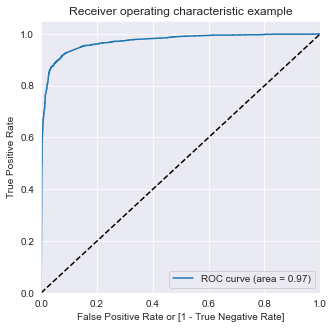

In [148]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_probability'])

**Inferences**
- The ROC Curve is 0.97 which is good as it is close to 1. 

### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that: 

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_probability'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007373,5663,0,1,0,0,0,0,0,0,0,0,0
1,0,0.048676,7446,0,1,0,0,0,0,0,0,0,0,0
2,0,0.095199,698,0,1,0,0,0,0,0,0,0,0,0
3,0,0.019914,214,0,1,0,0,0,0,0,0,0,0,0
4,1,0.912357,8963,1,1,1,1,1,1,1,1,1,1,1


In [150]:
# Calculating sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame(columns=['probability','accuracy','sensitivity','specificity'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
    
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.374979     1.000000     0.000000
0.1          0.1  0.838813     0.966727     0.762072
0.2          0.2  0.892598     0.949191     0.858646
0.3          0.3  0.921767     0.916367     0.925007
0.4          0.4  0.924970     0.898831     0.940653
0.5          0.5  0.927331     0.877698     0.957108
0.6          0.6  0.927500     0.855665     0.970596
0.7          0.7  0.912831     0.803957     0.978149
0.8          0.8  0.904063     0.772932     0.982735
0.9          0.9  0.881302     0.700540     0.989749


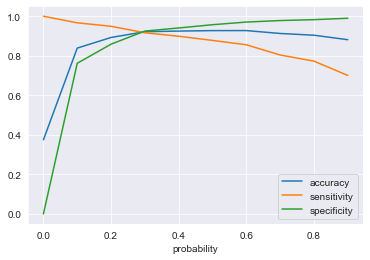

In [151]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Inferences**
-  Based on above graph, 0.3 is the optimum point to take it as a cutoff probability.

In [152]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_probability"].map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.007373,5663,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.048676,7446,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.095199,698,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.019914,214,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.912357,8963,1,1,1,1,1,1,1,1,1,1,1,1


In [153]:
# Adding Lead Score column
y_train_pred_final["Lead_score"] = y_train_pred_final["Converted_probability"].map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_score
0,0,0.007373,5663,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.048676,7446,0,1,0,0,0,0,0,0,0,0,0,0,5
2,0,0.095199,698,0,1,0,0,0,0,0,0,0,0,0,0,10
3,0,0.019914,214,0,1,0,0,0,0,0,0,0,0,0,0,2
4,1,0.912357,8963,1,1,1,1,1,1,1,1,1,1,1,1,91


In [154]:
 # Printing Accuracy for 0.3 cutoff probability Model
print("Model Accuracy: ",metrics.accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"]))

Model Accuracy:  0.9217669870173664


In [155]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])
confusion2

array([[3429,  278],
       [ 186, 2038]], dtype=int64)

In [156]:
# true positive 
TP = confusion2[1,1]

# true negatives
TN = confusion2[0,0] 

# false positives
FP = confusion2[0,1]

# false negatives
FN = confusion2[1,0] 

In [157]:
# Printing sensitivity of model
print("Sensitivity: ",TP / float(TP+FN))

Sensitivity:  0.9163669064748201


In [158]:
# Printing specificity of model
print("specificity: :",TN / float(TN+FP))

specificity: : 0.9250067439978419


In [159]:
# Printing False Postive Rate of model
print("False Postive Rate: ",FP/ float(TN+FP))

False Postive Rate:  0.07499325600215807


In [160]:
# Printing positive predictive value of model 
print("positive predictive value: ",TP / float(TP+FP))

positive predictive value:  0.8799654576856649


In [161]:
# Printing Negative predictive value of model 
print("Negative predictive value: ",TN / float(TN+ FN))

Negative predictive value:  0.9485477178423236


### Observation:
After running the model on the Train Data:
- Accuracy :    92.69%
- Sensitivity : 90.49%
- Specificity : 94.03%

#### Precision and Recall


In [162]:
# Printing Precision
print("Precision {}".format(((TP)/(TP + FP))))

Precision 0.8799654576856649


In [163]:
# Printing Recall
print("Recall {}".format(((TP)/(TP + FN))))

Recall 0.9163669064748201


In [164]:
print("Precision {}".format(precision_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])))
print("Recall {}".format(recall_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])))

Precision 0.8799654576856649
Recall 0.9163669064748201


#### Precision and Recall trade-off

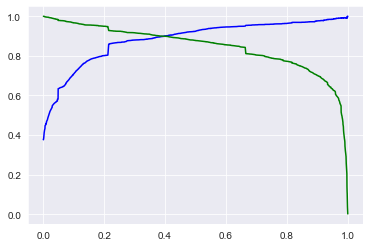

In [165]:
# Plotting the  precision_recall_curve  
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_probability"])
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")
plt.show()

#### Make predictions on the data set

In [166]:
# Scaling the X_test Dataset
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3569,0,0,0.532656,1.392017,1.162680,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2531,0,0,-1.186628,-0.864781,-1.256379,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7024,0,0,-1.186628,-0.864781,-1.256379,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2318,0,0,-0.326986,0.454437,-0.046850,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4091,0,0,0.102835,1.685584,0.557915,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [167]:
# Dropping Constant 
X_train_new = X_train_rfe2.drop(['const'], axis=1)

In [168]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [169]:
#Making predictions on the chosen model
y_pred= lm2.predict(X_test_new)
y_pred.head()

3569    0.839361
2531    0.048676
7024    0.212233
2318    0.216781
4091    0.992452
dtype: float64

In [170]:
#Convert y_test_pred to a DataFrame
y_pred_1 = pd.DataFrame(y_pred)
y_pred_1.head()

,0
3569,0.839361
2531,0.048676
7024,0.212233
2318,0.216781
4091,0.992452


In [171]:
#Convert y_test to a DataFrame
y_test_df = pd.DataFrame(y_test)
y_test_df["Prospect ID"] = y_test_df.index

In [172]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [173]:
# concatting both the Dataframes
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,3569,0.839361
1,0,2531,0.048676
2,0,7024,0.212233
3,0,2318,0.216781
4,1,4091,0.992452


In [174]:
# Rename the last column to show Conversion probability
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})

# Rearrange the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_probability'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_probability
0,3569,1,0.839361
1,2531,0,0.048676
2,7024,0,0.212233
3,2318,0,0.216781
4,4091,1,0.992452


In [175]:
# Adding final_predicted column to show predicted Values
y_pred_final['final_predicted'] = y_pred_final["Converted_probability"].map(lambda x: 1 if x > 0.30 else 0)

In [176]:
# Printing y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_probability,final_predicted
0,3569,1,0.839361,1
1,2531,0,0.048676,0
2,7024,0,0.212233,0
3,2318,0,0.216781,0
4,4091,1,0.992452,1


In [177]:
# Model accuracy
metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["final_predicted"])

0.9268580416830515

In [178]:
confusion_matrix = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_matrix

array([[1482,   94],
       [  92,  875]], dtype=int64)

In [179]:
# true positive 
TP = confusion_matrix[1,1]

# true negatives
TN = confusion_matrix[0,0] 

# false positives
FP = confusion_matrix[0,1]

# false negatives
FN = confusion_matrix[1,0] 

In [180]:
# Printing sensitivity of model
print("Sensitivity: ",TP / float(TP+FN),2)

Sensitivity:  0.9048603929679421 2


In [181]:
# Printing specificity of model
print("specificity: :",TN / float(TN+FP),2)

specificity: : 0.9403553299492385 2


In [182]:
# Printing Precision
print("Precision {}".format(precision_score(y_pred_final.Converted , y_pred_final.final_predicted)))

Precision 0.9029927760577915


In [183]:
# Printing Recall
print("Recall {}".format(recall_score(y_pred_final.Converted, y_pred_final.final_predicted)))

Recall 0.9048603929679421


### Observation:
After running the model on the Test Data:
- Accuracy :    92.69%
- Sensitivity : 90.49%
- Specificity : 94.03%

## Final Observation:

Comparing the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy :    92.18%
- Sensitivity : 91.63%
- Specificity : 92.50%

### <u> Test Data: </u>
- Accuracy :    92.69%
- Sensitivity : 90.49%
- Specificity : 94.03%